In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import pickle

In [2]:
def get_av_returns(foldname):
    # foldname format: './data/10-23-0/10_23_0/'
    subdirs = os.walk(foldname)
    fnames = [x[0]+'/progress.csv' for x in subdirs][1:]
    returns = []
    for fname in fnames:
        with open(fname) as csv_file:
            log_dict = csv.DictReader(csv_file)
            for i,row in enumerate(log_dict):
                returns.append(row['evaluation/Returns Mean'])
    return list(map(float,returns))

def Qmap(net,disc=50,bound=1):
    # Returns Qvals for a network
    disc = 50
    bound = 1

    Qvals = np.zeros((disc,disc,11))

    for i_ind, i in enumerate(np.linspace(-bound,bound,disc)):
        for j_ind, j in enumerate(np.linspace(-bound,bound,disc)):
            for a_ind,a in enumerate(np.linspace(-1,1,11)):
                inputs = torch.tensor([[i,j,a]]).float()
                Qvals[i_ind,j_ind,a_ind] = net['trainer/qf1'](inputs).detach().numpy()
    return Qvals

# diff nrns sac

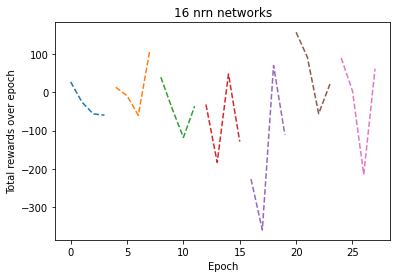

In [3]:
# 16 nrn networks 
r16 = get_av_returns('./data/10-23-0/10_23_0/')
for i in range(7):
    plt.plot(np.arange(i*4,i*4+4),r16[i*4:i*4+4],'--')
plt.title('16 nrn networks')
plt.ylabel('Total rewards over epoch')
plt.xlabel('Epoch');
# Colored by diff worms

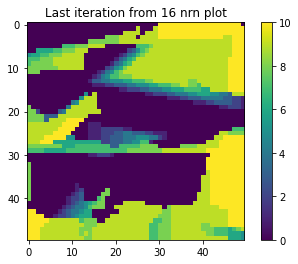

In [4]:
net = torch.load('./data/10-23-0/10_23_0/_2020_10_27_13_30_01_0000--s-0/itr_3.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Last iteration from 16 nrn plot');

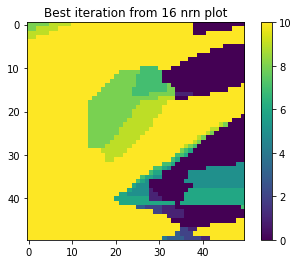

In [5]:
net = torch.load('./data/10-23-0/10_23_0/_2020_10_27_11_31_24_0000--s-0/itr_0.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Best iteration from 16 nrn plot');

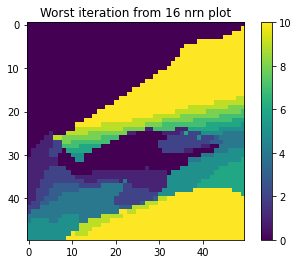

In [7]:
net = torch.load('./data/10-23-0/10_23_0/_2020_10_27_10_31_56_0000--s-0/itr_1.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Worst iteration from 16 nrn plot');

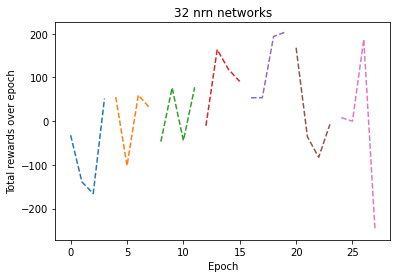

In [34]:
# 32 nrn networks 
r32 = get_av_returns('./data/10_22_0/')
for i in range(7):
    plt.plot(np.arange(i*4,i*4+4),r32[i*4:i*4+4],'--')
plt.title('32 nrn networks')
plt.ylabel('Total rewards over epoch')
plt.xlabel('Epoch');
# Colored by diff worms

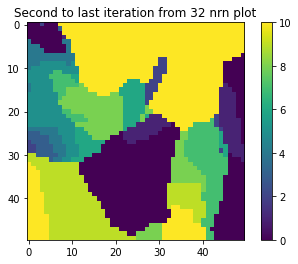

In [43]:
net = torch.load('./data/10_22_0/_2020_10_22_16_06_11_0000--s-0/itr_2.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Second to last iteration from 32 nrn plot');

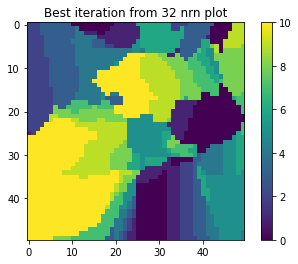

In [44]:
net = torch.load('./data/10_22_0/_2020_10_22_11_46_12_0000--s-0/itr_3.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Best iteration from 32 nrn plot');

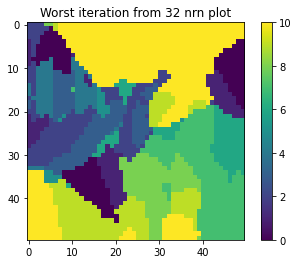

In [48]:
net = torch.load('./data/10_22_0/_2020_10_22_16_06_11_0000--s-0/itr_3.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Worst iteration from 32 nrn plot');

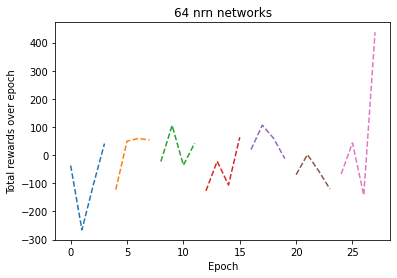

In [32]:
# 64 nrn networks 
r64 = get_av_returns('./data/10-23-1/10_23_1/')
for i in range(7):
    plt.plot(np.arange(i*4,i*4+4),r64[i*4:i*4+4],'--')
plt.title('64 nrn networks')
plt.ylabel('Total rewards over epoch')
plt.xlabel('Epoch');
# Colored by diff worms

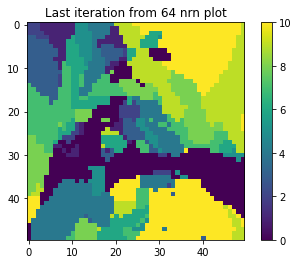

In [46]:
net = torch.load('./data/10-23-1/10_23_1/_2020_10_26_11_52_21_0000--s-0/itr_3.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Last iteration from 64 nrn plot');

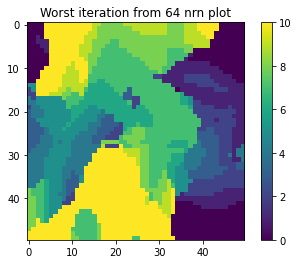

In [47]:
net = torch.load('./data/10-23-1/10_23_1/_2020_10_23_16_03_53_0000--s-0/itr_1.pkl')
Qvals = Qmap(net)
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar();
plt.title('Worst iteration from 64 nrn plot');